<a href="https://colab.research.google.com/github/Sameer-Tahir/Project_DS/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Libraries


In [ ]:
# !git clone https://github.com/Sameer-Tahir/Project_DS.git

In [2]:
# Import libraries
import pandas as pd   # data processing
import numpy as np    # linear algebra
import seaborn as sns
import matplotlib.pyplot as plt

#Uploading Dataset


In [3]:
df = pd.read_csv("/content/kernel_events_cleaned.csv")

In [4]:
df

,time,alarmtimer_alarmtimer_cancel,alarmtimer_alarmtimer_fired,alarmtimer_alarmtimer_start,alarmtimer_alarmtimer_suspend,alignment-faults,ase_spec,block_block_bio_backmerge,block_block_bio_bounce,block_block_bio_complete,...,writeback_writeback_wait_iff_congested,writeback_writeback_wake_background,writeback_writeback_write_inode,writeback_writeback_write_inode_start,writeback_writeback_written,State,Attack,Scenario,Label,interface
0,5.001477,0,0,0,0,0,693371795,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,0,0,0,0,0,699964025,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,0,0,0,0,0,549770341,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,0,0,0,0,0,571970875,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,0,0,0,0,0,553199786,0,0,0,...,0,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,0,0,0,0,0,5463807,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6162,288.714173,0,0,0,0,0,10977108,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6163,293.790086,0,0,0,0,0,3683292,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6164,298.861925,0,0,0,0,0,5165840,0,0,0,...,0,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp


In [5]:
# Separate columns by type
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

# Display counts
print(f"Number of numerical columns: {len(numerical_cols)}")
print(f"Number of categorical columns: {len(categorical_cols)}")

# Display categorical column names
print("Categorical columns:")
print(categorical_cols.tolist())

Number of numerical columns: 906
Number of categorical columns: 5
Categorical columns:
['State', 'Attack', 'Scenario', 'Label', 'interface']


In [6]:
print("Column Data Types:")
print(df.dtypes)

Column Data Types:
time                             float64
alarmtimer_alarmtimer_cancel       int64
alarmtimer_alarmtimer_fired        int64
alarmtimer_alarmtimer_start        int64
alarmtimer_alarmtimer_suspend      int64
                                  ...   
State                             object
Attack                            object
Scenario                          object
Label                             object
interface                         object
Length: 911, dtype: object


In [7]:
# Loop through each categorical column and print unique values
for col in categorical_cols:
    print(f"\nUnique values in '{col}':")
    print(df[col].unique())


Unique values in 'State':
['Charging' 'idle']

Unique values in 'Attack':
['cryptojacking' 'none' 'aggressive-scan' 'icmp-flood'
 'icmp-fragmentation_old' 'os-fingerprinting' 'port-scan' 'push-ack-flood'
 'serice-detection' 'syn-flood' 'syn-stealth' 'tcp-flood' 'udp-flood'
 'vuln-scan' 'icmp-fragmentation' 'service-detection'
 'synonymous-ip-flood' 'os-scan']

Unique values in 'Scenario':
['Cryptojacking' 'Benign' 'Recon' 'DoS']

Unique values in 'Label':
['attack' 'benign']

Unique values in 'interface':
['any' 'none' 'ocpp' 'iso15118']


In [8]:
def check_zero_columns(df, name="Kernel"):
    all_zero_cols = []
    mixed_cols = []

    for col in df.columns:
        # Skip categorical columns (object/string type)
        if df[col].dtype == 'object':
            continue

        # Check if column is all null
        if df[col].isnull().all():
            all_zero_cols.append(col)
        # Check if column is all 0
        elif (df[col] == 0).all():
            all_zero_cols.append(col)
        # Check if column has some 0 and some non-0
        elif (df[col] == 0).any():
            mixed_cols.append(col)

    print(f"\n--- {name} ---")
    print(f"Columns ALL zero/null ({len(all_zero_cols)}): {all_zero_cols}")
    print(f"Columns with MIXED values (zeros + non-zeros) ({len(mixed_cols)}): {mixed_cols}")

# Run for both datasets
check_zero_columns(df, "Kernel Events")


--- Kernel Events ---
Columns ALL zero/null (685): ['alarmtimer_alarmtimer_cancel', 'alarmtimer_alarmtimer_fired', 'alarmtimer_alarmtimer_start', 'alarmtimer_alarmtimer_suspend', 'alignment-faults', 'block_block_bio_bounce', 'block_block_bio_complete', 'block_block_bio_frontmerge', 'block_block_rq_merge', 'block_block_rq_remap', 'block_block_rq_requeue', 'block_block_split', 'bpf-output', 'bus_access_shared', 'cid_write_retired', 'clk_clk_disable', 'clk_clk_disable_complete', 'clk_clk_enable', 'clk_clk_enable_complete', 'clk_clk_prepare', 'clk_clk_prepare_complete', 'clk_clk_set_duty_cycle', 'clk_clk_set_duty_cycle_complete', 'clk_clk_set_max_rate', 'clk_clk_set_min_rate', 'clk_clk_set_parent', 'clk_clk_set_parent_complete', 'clk_clk_set_phase', 'clk_clk_set_phase_complete', 'clk_clk_set_rate', 'clk_clk_set_rate_complete', 'clk_clk_set_rate_range', 'clk_clk_unprepare', 'clk_clk_unprepare_complete', 'crypto_spec', 'dummy', 'emulation-faults', 'exc_fiq', 'exc_hvc', 'exc_smc', 'exc_trap_

In [10]:
df = df.loc[:, (df != 0).any(axis=0)]


In [11]:
df

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty,State,Attack,Scenario,Label,interface
0,5.001477,693371795,0,0,0,0,0,0,0,0,...,215675,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
1,5.001487,699964025,0,0,0,0,0,0,0,0,...,72029,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
2,5.001641,549770341,0,0,0,0,0,0,0,0,...,87776,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
3,5.003762,571970875,0,0,0,0,0,0,0,0,...,239473,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
4,10.065740,553199786,0,0,0,0,0,0,0,0,...,186538,0,0,0,0,Charging,cryptojacking,Cryptojacking,attack,any
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6161,283.646045,5463807,0,0,0,0,0,0,0,0,...,828202,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6162,288.714173,10977108,0,0,0,0,0,0,0,0,...,337160,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6163,293.790086,3683292,0,0,0,0,0,0,0,0,...,151134,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp
6164,298.861925,5165840,0,0,0,0,0,0,0,0,...,314585,0,0,0,0,Charging,synonymous-ip-flood,DoS,attack,ocpp


In [12]:
print(df['Label'].value_counts())
print(df['Scenario'].value_counts())
print(df['Attack'].value_counts())
print(df['interface'].value_counts())

Label
attack    3864
benign    2302
Name: count, dtype: int64
Scenario
Benign           2302
Cryptojacking    1793
Recon            1206
DoS               865
Name: count, dtype: int64
Attack
none                      2302
cryptojacking             1793
port-scan                  201
vuln-scan                  192
syn-stealth                189
aggressive-scan            182
service-detection          139
icmp-flood                 128
push-ack-flood             127
syn-flood                  126
os-fingerprinting          123
tcp-flood                  123
synonymous-ip-flood        122
udp-flood                  120
icmp-fragmentation         119
icmp-fragmentation_old      61
serice-detection            60
os-scan                     59
Name: count, dtype: int64
interface
none        2944
ocpp        1653
any         1151
iso15118     418
Name: count, dtype: int64


In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6166 entries, 0 to 6165
Columns: 226 entries, time to interface
dtypes: float64(2), int64(219), object(5)
memory usage: 10.6+ MB
None


In [16]:

float_columns = df.select_dtypes(include='float64')
print(float_columns.columns)


Index(['time', 'msec'], dtype='object')


In [17]:
df.describe()

,time,ase_spec,block_block_bio_backmerge,block_block_bio_queue,block_block_bio_remap,block_block_dirty_buffer,block_block_getrq,block_block_plug,block_block_rq_complete,block_block_rq_insert,...,tcp_tcp_send_reset,ttbr_write_retired,unaligned_ld_spec,unaligned_ldst_spec,unaligned_st_spec,vfp_spec,writeback_writeback_dirty_inode,writeback_writeback_dirty_inode_start,writeback_writeback_dirty_page,writeback_writeback_mark_inode_dirty
count,6166.000000,6.166000e+03,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,6166.000000,...,6166.000000,6.166000e+03,6.166000e+03,6.166000e+03,6.166000e+03,6.166000e+03,6166.000000,6166.000000,6166.000000,6166.000000
mean,1860.346013,1.911801e+08,6.999513,16.462050,15.734350,1.661855,8.244080,4.346902,8.212780,8.214888,...,1175.252027,4.602576e+05,6.733828e+06,7.091462e+06,3.575249e+05,4.112948e+05,3.058547,3.058547,1.387772,4.856147
std,1813.883544,2.954542e+08,149.189791,285.895499,273.077542,55.774316,143.623573,91.116824,142.929996,143.053854,...,9463.686994,3.242693e+05,8.198583e+06,8.167278e+06,4.910568e+05,5.962581e+05,95.805455,95.805455,50.337608,138.947591
min,5.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,1.158600e+04,1.189300e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,212.848095,1.724897e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.483830e+05,1.039808e+06,1.346732e+06,7.904300e+04,3.477475e+04,0.000000,0.000000,0.000000,0.000000
50%,1285.785559,5.755380e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,3.949615e+05,2.087994e+06,2.568078e+06,2.770580e+05,2.186255e+05,0.000000,0.000000,0.000000,0.000000
75%,3239.592572,5.414566e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,7.083622e+05,1.732339e+07,1.763779e+07,3.682378e+05,4.629372e+05,0.000000,0.000000,0.000000,0.000000
max,5855.669471,9.738758e+08,5343.000000,8075.000000,7780.000000,2282.000000,4398.000000,3651.000000,4388.000000,4398.000000,...,168828.000000,2.421179e+06,2.678071e+07,2.702705e+07,6.270289e+06,7.154448e+06,5162.000000,5162.000000,2132.000000,5251.000000


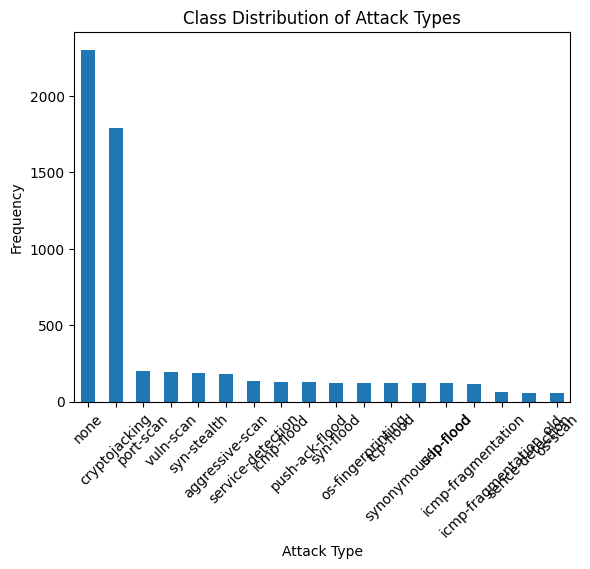

In [20]:
df['Attack'].value_counts().plot(kind='bar')
plt.title('Class Distribution of Attack Types')
plt.xlabel('Attack Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()